# Handwriting Recognition

This Jupyter Notebook uses neural networks to classify handwritten digits 0 through 9.

## Approach
* Evaluations of classification performed were performed a sample dataset:
<br>Keras MNIST sample dataset of handwritten digits 0 through 9, consisting 60.000 grayscale images (28x28 pixels) for training/validation and 10,000 images for testing
* A deep learning neural network was defined with 3 layers and a total of 50 nodes, including 10 nodes to represent each of the 10 digits 0 through 9.
* The fitting history of the model was plotting, showing how accuracy and loss using the training data varied by epoch.  In addition, horizontal lines were added to reflect the accuracy and loss when the fitted model was used with the testing data.
    
## Results
* Refer to the Figure provided below
* The neural network fitting history shows a maximum training accuracy of 0.9675 starting at epoch 9.
* The fitted model yielded an accuracy of 0.9594 with the testing data.
* The classification accurancy could be improved by using augmentation (rotation, translation, or transformations of the sample images) during training to provide for a more robust model.

| Figure: 10-Figure-Handwriting Recognition - Jupyter Notebook |
|----------|
| ![Figure: 10-Figure-Handwriting Recognition Model Fitting History is Loading...](docs/10-Figure-Handwriting_Recognition-Model_Fitting_History.png "Figure: 10-Figure-Handwriting Recognition Model Fitting History") |



# Dependencies

In [1]:
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D    # Support 3D graphing

import numpy as np
import pandas as pd
from pandas.plotting import table
import math
import random

from pprint import pprint


# Visualization
import graphviz
import pydotplus

from IPython.display import Image

# Machine Learning - Data Preparation and Pre-Processing
from sklearn.model_selection import train_test_split # Split data into training and testing samples
from sklearn.model_selection import cross_val_score  # Score a model using k-fold or other cross validation

from sklearn.preprocessing import OneHotEncoder   # Convert categorical integer features (X) to One-Hot encoded values
from sklearn.preprocessing import LabelEncoder    # Convert categorical labeled values to categorical integer values
from sklearn.preprocessing import LabelBinarizer  # Convert categorical labeled values to Binary encoded values

from sklearn.preprocessing import StandardScaler  # Scale numerical features to standard normal distribution
from sklearn.preprocessing import MinMaxScaler    # Scale numerical values based upon mix/max values

# Machine Learning - Sci-Kit Learn - Models - Regression
from sklearn.linear_model import LinearRegression  # TBD
from sklearn.linear_model import Lasso             # TBD
from sklearn.linear_model import Ridge             # TBD
from sklearn.linear_model import ElasticNet        # TBD

# Machine Learning - Sci-Kit Learn - Models - Classification
from sklearn.linear_model import LogisticRegression   # Logistic Regression Classifier
from sklearn import tree                              # Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier   # Random Forest Classifier
from sklearn import svm                               # Support Vector Machine Classifier
from sklearn.neighbors import KNeighborsClassifier    # K-Nearest Neighbors (KNN)

# Machine Learning - GridSearch for Hyper-Parameter tuning
from sklearn.model_selection import GridSearchCV      # Grid Search

# Machine Learning - Quantify Model Performance
from sklearn.metrics import mean_squared_error    # Mean Squared Error (MSE) metric
from sklearn.metrics import r2_score              # R-squared (Coefficient of Determination) metric
from sklearn.metrics import confusion_matrix      # Generate a confusion matrix (actual vs. predicted counts)
from sklearn.metrics import classification_report # Calculate metrics for prediction performance
from sklearn.metrics import precision_score       # Calculate the precision: Tp / (Tp + Fp) => Ability to avoid false negatives
from sklearn.metrics import recall_score          # Calculate the recall: Tp / (Tp + Fn) => Ability to find all positive samples
from sklearn.metrics import f1_score              # Calculate the F1 score: 2*(precision*recall)/(precision+recall)

# Machine Learning - Dataset Generation
from sklearn.datasets import make_regression     # Generate linear data
from sklearn.datasets import make_s_curve        # Generate nonlinear data
from sklearn.datasets import make_blobs          # Generate blobs for classification
from sklearn.datasets import make_circles        # Generate circles for classification
from sklearn.datasets import load_iris           # Sample multi-class dataset for classification
from sklearn.datasets import make_classification # Generate datasets for classification

# Machine Learning - Keras (Tensorflow) - Models
from keras.models import Sequential               # Sequential model serving as foundation for neural network
from keras.layers import Dense                    # Nodes for specifying input, hidden, and output layers

# Machine Learning - Keras (Tensorflow) - Encoding
from keras.utils import to_categorical            # One-Hot Encoder provided through Keras

# Machine Learning - Keras (Tensorflow) - Other related Tools
from keras.utils import plot_model                # Plot a neural network model
from keras.models import load_model               # Load a saved machine learning model
from keras.preprocessing import image             # Loads an image for application of machine learning
from keras.preprocessing.image import img_to_array # Converts an image to a numpy array

# Machine Learning - Keras (Tensorflow) -  Dataset Generation
from keras.datasets import mnist                  # Images: Handwritten digits 0-9 (28x28 grayscale, 60K train, 10K test)

Using TensorFlow backend.


# Handwritten Digits 0-9 Dataset

### Function to Plot Lists of Digits

In [2]:
# Function to plot a list of up to 10 digits on a single subplot
def plot_digit_list( a_X_list = None, a_y_list = None, a_find_all_digits = False):
    # The first 10 digits from the specified list
    
    # If no list is specified then return None        
    if (a_X_list is None):
        return None
    
    else:
        X_list = list(a_X_list)
        
    if (a_y_list is None):
        return None
    
    else:
        y_list = list(a_y_list)
        
    # Find All Digits flag
    #   If True => Find and plot all digits 0-9 within the list, starting at index 0
    #   If False => Plot up to the first 10 digits in the list
    if a_find_all_digits:

        # Flag is True: Get indices of samples for each of the digits 0-9 within the 1000 sample subset
        # If the digit is not present in the input list then move on to the next digit
        d_i_list = []
        for d in range(10):
            
            try:
                # Add the index at which this digit can be found to the list
                d_i_list.append( y_list.index(d) )
                
            except ValueError:
                # Digit is not present in the input list -- move on to the next digit
                pass

    else:
        # Flag is False: Get the indices for up to the first 10 values in the list
        d_i_list = range( min(10, len(y_list) ))
    
    # The iterpolation method to use for ploting the digit images
    i_type_selected = 'lanczos'

    print("Indices:", d_i_list)

    # Plot Classification Performance results: Best Score vs. Mean Fit Time (ms)
    fig = plt.figure(figsize=(20,9))

    # Create subplots for each of the sampled digits
    for i in range(len(d_i_list)):
        # Create a subplot for this iteration
        ax = fig.add_subplot( math.ceil(len(d_i_list)/min(5, len(d_i_list))), min(5, len(d_i_list)), i+1 )

        # Display a note for each subplot
        point_text = f"Digit: {y_list[d_i_list[i]]}"
        point_text += f"\nSample Index: {d_i_list[i]}"
    #     ax.text(1, 2+1.4*point_text.count("\n"), point_text )
        ax.set_title(point_text)

        # Display the image
        ax.imshow(X_list[d_i_list[i]], cmap=plt.cm.Greys, interpolation=i_type_selected)
        
    # Return the number of digits plotted
    return i+1

### Load the MNIST Handwritten Digit Dataset

In [3]:
# Import the Keras MNIST handwritten digits sample dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Indices: [1, 3, 5, 7, 2, 0, 13, 15, 17, 4]


10

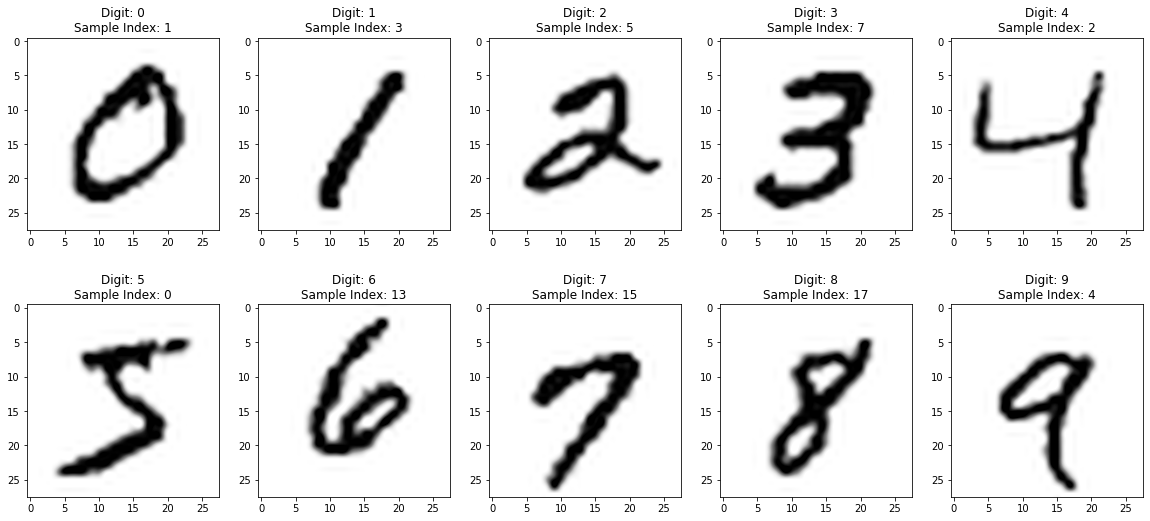

In [4]:
plot_digit_list(X_train, y_train, True)

In [5]:
# Display the current shape of the input and output data
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Flatten the 28x28 pixel images to a 1D array of 784 pixels
ndims = X_train.shape[1] * X_train.shape[2]
X_train_flat = X_train.reshape(X_train.shape[0], ndims)
X_test_flat = X_test.reshape(X_test.shape[0], ndims)
print(X_train_flat.shape, X_test_flat.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(60000, 784) (10000, 784)


In [6]:
# Use a scalar to scale the training data to values between 0 and 1 (MinMaxScalar)
# Q: How would the results differ if we applied StandardScalar instead of MixMaxScalar
x_scalar = MinMaxScaler().fit(X_train_flat)
X_train_scaled = x_scalar.transform(X_train_flat)
X_test_scaled = x_scalar.transform(X_test_flat)

In [7]:
# Apply One-Hot Encoding to the labels

# Ensure that all 10 digits are reflected in the encoding,
# even if they happen not to be in the training or test sets
n_classes = 10

y_train_encoded = to_categorical(y_train, n_classes)
y_test_encoded = to_categorical(y_test, n_classes)

In [8]:
# Display the shape of the input and output data
print(X_train_scaled.shape, y_train_encoded.shape, X_test_scaled.shape, y_test_encoded.shape)

(60000, 784) (60000, 10) (10000, 784) (10000, 10)


### Define the Neural Network model for multi-class, single-label classification

In [9]:
# Create a sequential model
model = Sequential()

W0909 16:46:38.535714  2088 deprecation_wrapper.py:119] From C:\Users\Jeff\AppData\Local\conda\conda\envs\PythonTF\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [10]:
# Number of Inputs:
n_inputs = X_train_scaled.shape[1]

# Number of Classes:
n_classes = y_train_encoded.shape[1]

# Add input and first layer - Number of Hidden Nodes: 10
model.add(Dense(units=20, activation='relu', input_dim=n_inputs))

# Add another hidden layer - Number of Hidden Nodes: 10
model.add(Dense(units=20, activation='relu'))

# Number of output nodes (units) needed = Number of classes
model.add(Dense(units=n_classes, activation='softmax'))

# Provide a summary of the model
model.summary()

W0909 16:46:38.582714  2088 deprecation_wrapper.py:119] From C:\Users\Jeff\AppData\Local\conda\conda\envs\PythonTF\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0909 16:46:38.586732  2088 deprecation_wrapper.py:119] From C:\Users\Jeff\AppData\Local\conda\conda\envs\PythonTF\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


### Compile the Model

In [11]:
# Compile the model
# Optimizer: Adam
# Loss Function: Categorical Cross-Entropy for categorical data (Mean Squared Error for regression)
# Metrics: Accuracy
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

W0909 16:46:38.681714  2088 deprecation_wrapper.py:119] From C:\Users\Jeff\AppData\Local\conda\conda\envs\PythonTF\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0909 16:46:38.724729  2088 deprecation_wrapper.py:119] From C:\Users\Jeff\AppData\Local\conda\conda\envs\PythonTF\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



### Train the Model

In [12]:
#%%timeit -n1 -r1
# Fit (train) the model
hist = model.fit(
    X_train_scaled,
    y_train_encoded,
    epochs=10,
    shuffle=True,
    verbose=2
)

W0909 16:46:38.893715  2088 deprecation.py:323] From C:\Users\Jeff\AppData\Local\conda\conda\envs\PythonTF\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0909 16:46:38.969713  2088 deprecation_wrapper.py:119] From C:\Users\Jeff\AppData\Local\conda\conda\envs\PythonTF\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
 - 4s - loss: 0.4159 - acc: 0.8788
Epoch 2/10
 - 4s - loss: 0.2140 - acc: 0.9377
Epoch 3/10
 - 4s - loss: 0.1764 - acc: 0.9480
Epoch 4/10
 - 3s - loss: 0.1564 - acc: 0.9535
Epoch 5/10
 - 4s - loss: 0.1432 - acc: 0.9578
Epoch 6/10
 - 4s - loss: 0.1316 - acc: 0.9601
Epoch 7/10
 - 4s - loss: 0.1244 - acc: 0.9624
Epoch 8/10
 - 4s - loss: 0.1165 - acc: 0.9648
Epoch 9/10
 - 4s - loss: 0.1107 - acc: 0.9666
Epoch 10/10
 - 4s - loss: 0.1060 - acc: 0.9675


### Evaluate the Model

In [13]:
# Evaluate the model using the testing data
m_score_list = model.evaluate(X_test_scaled, y_test_encoded, verbose=2)
m_label_list = model.metrics_names

# Print the metrics and their associated labels
for i in range(len(m_score_list)):
    print(f"{m_label_list[i].title()}: {m_score_list[i]:0.4f}")

Loss: 0.1407
Acc: 0.9594


In [14]:
hist.history.keys()

dict_keys(['loss', 'acc'])

### Plot Model Fitting History

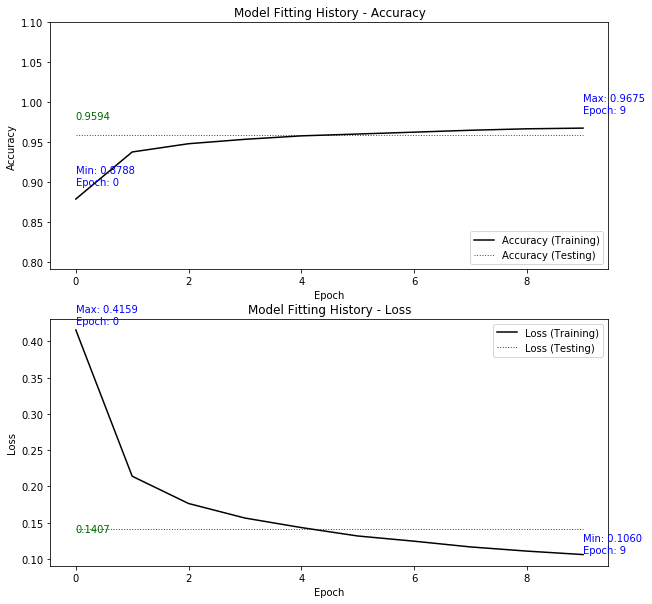

In [22]:
# Plot Epoch history
# fig1 = plt.figure(figsize=(10,10))
fig1 = plt.figure(figsize=(10,10))

# Create a single plot of all results
ax1 = fig1.add_subplot( 2,1,1 )
ax2 = fig1.add_subplot( 2,1,2 )

# X-axis
x_vals = range(len(hist.history['acc']))

# Plots
ax1.set_ylim(ymin=0.9*min(hist.history['acc']), ymax=1.1)
ax1.plot( x_vals, hist.history['acc'],
          label='Accuracy (Training)', c='k', linestyle='-')

ax2.plot( x_vals, hist.history['loss'],
          label='Loss (Training)', c='k', linestyle='-')

# Add text note on the max and min accuracy and loss points
acc_min_idx = np.argmin(hist.history['acc'])
ax1.text( x=acc_min_idx, y=hist.history['acc'][acc_min_idx]*1.02, c='b',
          s=f"Min: {hist.history['acc'][acc_min_idx]:.4f}\nEpoch: {acc_min_idx}" )

acc_max_idx = np.argmax(hist.history['acc'])
ax1.text( x=acc_max_idx, y=hist.history['acc'][acc_max_idx]*1.02, c='b',
          s=f"Max: {hist.history['acc'][acc_max_idx]:.4f}\nEpoch: {acc_max_idx}" )

loss_min_idx = np.argmin(hist.history['loss'])
ax2.text( x=loss_min_idx, y=hist.history['loss'][loss_min_idx]*1.02, c='b',
          s=f"Min: {hist.history['loss'][loss_min_idx]:.4f}\nEpoch: {loss_min_idx}" )
         
loss_max_idx = np.argmax(hist.history['loss'])
ax2.text( x=loss_max_idx, y=hist.history['loss'][loss_max_idx]*1.02, c='b',
          s=f"Max: {hist.history['loss'][loss_max_idx]:.4f}\nEpoch: {loss_max_idx}" )

# If populated, plot the loss and accuracy from the test samples
try:
    loss_val = m_score_list[0]
    acc_val = m_score_list[1]

    ax1.text( x=min(x_vals), y=acc_val*1.02, c='darkgreen', s=f"{acc_val:.4f}")
    ax1.hlines(y=acc_val, xmin=min(x_vals), xmax=max(x_vals),
              label='Accuracy (Testing)', color='g', linewidth=1, linestyle=':')    
    
    ax2.text( x=min(x_vals), y=loss_val*0.97, c='darkgreen', s=f"{loss_val:.4f}")
    ax2.hlines(y=loss_val, xmin=min(x_vals), xmax=max(x_vals),
              label='Loss (Testing)', color='g', linewidth=1, linestyle=':')    
except:
    pass
    
ax1.legend(loc='lower right')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax1.set_title("Model Fitting History - Accuracy")

ax2.legend(loc='upper right')
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")
ax2.set_title("Model Fitting History - Loss")

fig1.savefig("docs/10-Figure-Handwriting_Recognition-Model_Fitting_History.png")

### Make Some Predictions

In [26]:
# Make some predictions using the testing data
y_encoded_predictions = model.predict_classes(X_test_scaled)
y_encoded_actuals = [ np.argmax(y_val.round()) for y_val in y_test_encoded ]

In [27]:
# Summarize the prediction results in a dataframe
predict_sample_df = pd.DataFrame(
    {'Actual': y_encoded_actuals,
     'Prediction': y_encoded_predictions})
predict_sample_df['Correct'] = (predict_sample_df['Actual'] == predict_sample_df['Prediction'])

predict_sample_df.head()

,Actual,Prediction,Correct
0,7,7,True
1,2,2,True
2,1,1,True
3,0,0,True
4,4,4,True


Indices: range(0, 10)


10

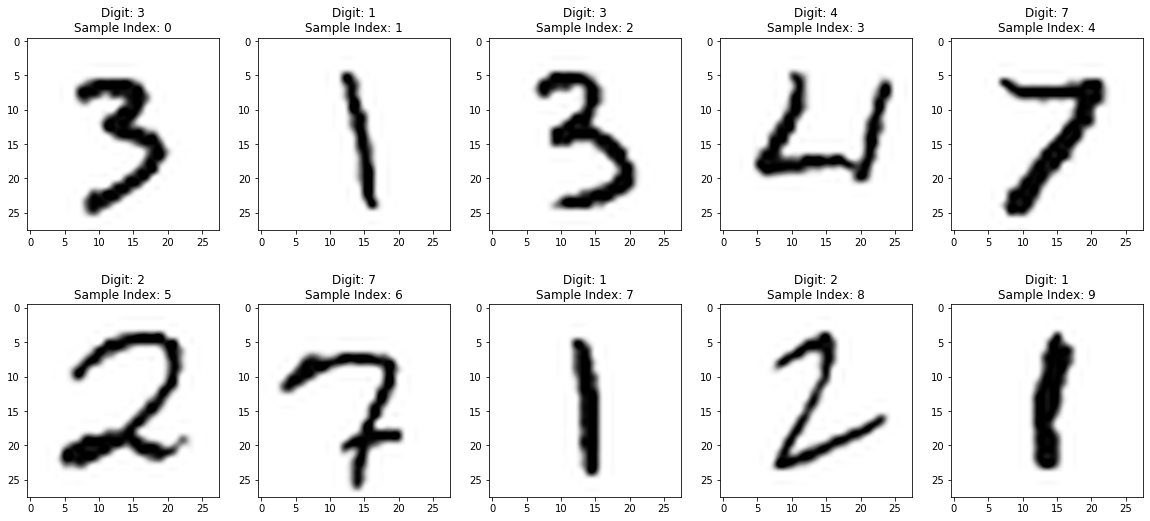

In [28]:
s_min = 30
s_max = 40
plot_digit_list(X_test[s_min:s_max], y_encoded_actuals[s_min:s_max], False)

In [30]:
m_accuracy = sum(predict_sample_df['Correct']) / len(predict_sample_df['Correct'])
print(f"Model Accuracy: {m_accuracy:.4f}")

Model Accuracy: 0.9594


### Save the Fitted Model

In [31]:
# Save the fitted model
model.save("resources/mnist_digits_model.h5")

### Load a Fitted Model

In [32]:
# Reload the fitted model
prev_model = load_model("resources/mnist_digits_model.h5")

In [33]:
# Make some predictions using the testing data

y_encoded_predictions = model.predict_classes(X_test_scaled)
y_encoded_actuals = [ np.argmax(y_val.round()) for y_val in y_test_encoded ]

# Summarize the prediction results in a dataframe
predict_sample_df = pd.DataFrame(
    {'Actual': y_encoded_actuals,
     'Prediction': y_encoded_predictions})

predict_sample_df['Correct'] = (predict_sample_df['Actual'] == predict_sample_df['Prediction'])
predict_sample_df.head()

,Actual,Prediction,Correct
0,7,7,True
1,2,2,True
2,1,1,True
3,0,0,True
4,4,4,True


### Import a Custom Image

In [34]:
# Reload the fitted model
prev_model = load_model("resources/mnist_digits_model.h5")

In [35]:
# File path and name of the image to be processed
test_image_file = "resources/digit_test_2.png"
# test_image_file = "resources/digit_test_8.png"

In [36]:
# Import the image - known to be a PNG format file (28px height by 28px width, grayscale w/ 24 bit depth)
image_size = (28, 28)
test_image = image.load_img(test_image_file, target_size=image_size, grayscale=True)
test_image

C:\Users\Jeff\AppData\Local\conda\conda\envs\PythonTF\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [37]:
# Convert the image to a numpy array
test_digit = img_to_array(test_image)
test_digit.shape

(28, 28, 1)

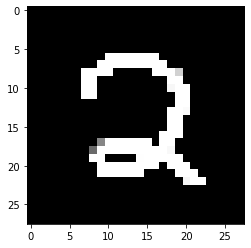

In [38]:
# Plot the test digit
# NOTE: This is light characters on dark background; the grayscale will be inverted later before prediction
plt.imshow(test_digit.reshape(28,28), cmap=plt.cm.Greys)

In [39]:
# Flatten the 28x28 pixel images to a 1D array of 784 pixels
test_digit_ndims = test_digit.shape[0] * test_digit.shape[1]
test_digit_flat = test_digit.reshape(-1, test_digit_ndims)
test_digit_flat.shape

(1, 784)

In [40]:
# Scale the test digit using the x_scaler already created
test_digit_scaled = x_scalar.transform(test_digit_flat)

# Scale the digit using a simple linear scaling
# test_digit_scaled = test_digit_flat / 255

# test_digit_scaled

In [41]:
# Invert the image so that the digit itself is dark vs light background
test_digit_scaled_inverted = 1 - test_digit_scaled

In [42]:
# Predict what number this is based upon the previously trained model
prev_model.predict_classes(test_digit_scaled_inverted)

array([5], dtype=int64)